Задачи
Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
Какой клиент совершил больше всего успешных операций? (success == True)
С какой платформы осуществляется наибольшее количество успешных операций?
Какую платформу предпочитают премиальные клиенты?
Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
Постройте график распределения числа успешных операций
Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?
 

Описание данных
user_data:

client – идентификатор пользователя
premium – является ли клиент премиальным
age – возраст
logs:

client – идентификатор пользователя
success – результат (успех – 1, нет – 0)
platform – платформа
time – время в формате Unix

In [ ]:
Описание данных

user_data:
client – идентификатор пользователя
premium – является ли клиент премиальным
age – возраст

logs:
client – идентификатор пользователя
success – результат (успех – 1, нет – 0)
platform – платформа
time – время в формате Unix

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns


%matplotlib inline

In [9]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv' )  #  parse_dates=['time']

In [10]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [14]:
user_data.shape

(2954, 3)

In [11]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [15]:
logs.shape

(4500, 4)

In [16]:
user_data.client.nunique()

2954

In [17]:
logs.client.nunique()

4011

In [13]:
# Сколько уникальных значений принимает переменная platform?
logs.platform.nunique()

3

In [ ]:
# Какой клиент совершил больше всего успешных операций?


In [26]:
success_count_df = logs.groupby('client', as_index=False).agg({'success':'sum'}).rename(columns= {'success':'succcess_count'}).\
    sort_values('succcess_count', ascending=False)

In [27]:
success_count_df.head()

,client,succcess_count
3300,82563,41.0
1426,36165,41.0
2095,52870,41.0
468,12179,41.0
2469,61473,41.0


In [42]:
list_best_clien = list(success_count_df[success_count_df.succcess_count == success_count_df.succcess_count.max()].\
                        sort_values('client').client)
# for sorting LIST: list_best_clien.sort()

In [43]:
list_best_clien

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [44]:
# С какой платформы было совершено наибольшее количество успешных операций?
order_by_platform = logs.groupby('platform', as_index=False).agg({'success':'sum'})

order_by_platform

,platform,success
0,computer,1090.0
1,phone,2019.0
2,tablet,180.0


In [45]:
# Какую платформу предпочитают премиальные клиенты?
# create table with orders and clients data
full_df = logs.merge(user_data, how = 'left', on = 'client')
full_df.head()

,client,success,platform,time,premium,age
0,40177,True,phone,1585412212,NaN,NaN
1,61468,True,phone,1585425658,False,25.0
2,35604,False,phone,1585459894,True,65.0
3,9961,True,phone,1585400189,NaN,NaN
4,10931,True,computer,1585468629,False,28.0


In [48]:
order_by_platform_premiumclient = full_df[full_df.premium == False].groupby('platform', as_index=False).agg({'success':'sum'})

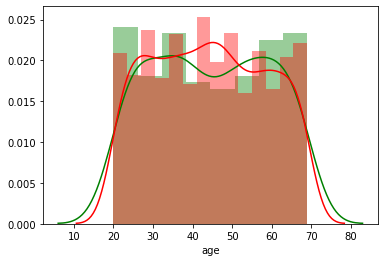

In [58]:
# Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет),
# используя библиотеку seaborn с исходными параметрами. Какой график получится в результате?
sns.distplot(user_data[user_data.premium == True].age , color = 'g')
sns.distplot(user_data[user_data.premium == False].age , color = 'r')

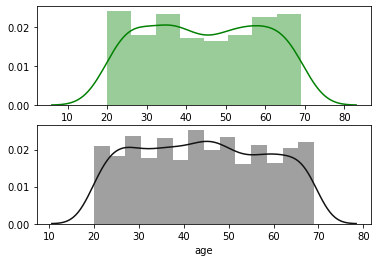

In [64]:
# for few plots
figs, ax = plt.subplots(nrows=2 , ncols=1)
sns.distplot(user_data[user_data.premium == True].age , color = 'green' , ax = ax[0])
sns.distplot(user_data[user_data.premium == False].age , color = '#121212' , ax = ax[1])

In [ ]:
# Постройте график распределения числа успешных операций: 
#
# x – число успешных операций
# y – число клиентов, совершивших такое количество успешных операций

In [68]:
client_success_count = logs.groupby('client').agg({'success':'sum'}).rename(columns= {'success':'succcess_count'})
success_count_df.head()

,client,succcess_count
0,40,1.0
1,50,1.0
2,75,1.0
3,81,1.0
4,132,1.0


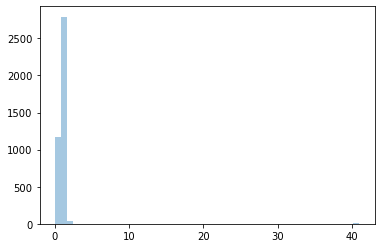

In [70]:
sns.distplot(client_success_count, kde=False)

In [76]:
client_success_count.succcess_count.value_counts()

1.0     2791
0.0     1166
2.0       43
41.0       9
3.0        1
40.0       1
Name: succcess_count, dtype: int64

In [75]:
client_success_count.succcess_count.value_counts(normalize=True)

1.0     0.695836
0.0     0.290701
2.0     0.010721
41.0    0.002244
3.0     0.000249
40.0    0.000249
Name: succcess_count, dtype: float64

In [ ]:
# Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot.
# По оси x – возраст, по оси y – число успешных операций.
# Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

# Полезные ссылки:
# sns.countplot – документация к типу графика (https://seaborn.pydata.org/generated/seaborn.countplot.html)
# figsize – про размер графиков  (https://stepik.org/lesson/375667/step/16?unit=363417)

In [117]:
age_success_count = full_df.groupby('age', as_index=False).agg({'success':'sum'})
age_success_count.sort_values('success', ascending=False).head()

,success
age,
28.0,120.0
25.0,93.0
68.0,92.0
52.0,90.0
49.0,86.0


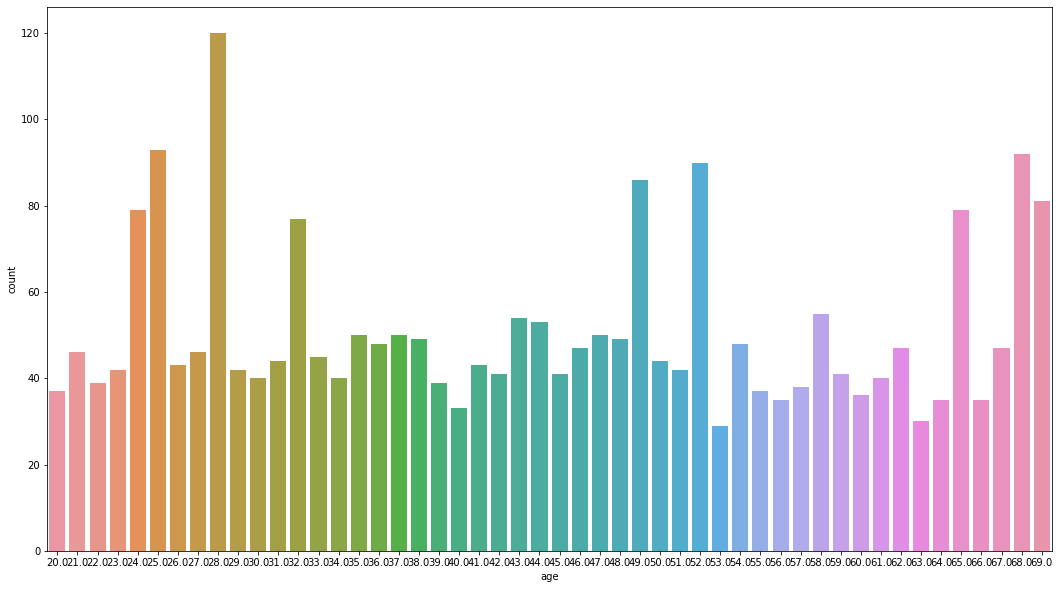

In [120]:
plt.figure(figsize=(18, 10))
ax=sns.countplot(x='age', data = full_df[full_df.success == True])